# TP1 Big Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Tirage de g et s

In [2]:
def ensalea( n = 4,
             a = 0.3,
             flag = False):
    
    g = np.zeros((n,2))
    for i in range(n):
        g[i,0] = np.random.uniform(0.2,0.8)  # coordonnées x1
        g[i,1] = np.random.uniform(0.2,0.8)  # coordonnées x2
        
    s = np.zeros(n)
    for i in range(n):
        s[i] = np.random.uniform(0.0,a)
        
    if flag == True:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1)
        x1 = [ g[i,0] for i in range(n)]
        x2 = [ g[i,1] for i in range(n)]
        plt.scatter(x1, x2,color='red')
        # rajouter affichage des courbes de niveau à 0.5
        taille = 50
        for i in range(taille):
            for j in range (taille):
                x1, x2 = i/taille, j/taille
                if get_classe(x1, x2, g, s) == 1:
                    plt.scatter(x1, x2, color='blue', marker='.')
        axes = plt.gca()
        axes.set_ylim([0.0,1.0])
        axes.set_xlim([0.0,1.0])
        plt.show()
        
    return g, s

Fonction utilitaire

In [3]:
def get_classe(x1,x2,g,s):
    
    # retourne 1 si le point (x,y) est dans A, 0 sinon
        
    level = 0
    for i in range(len(s)):
        level += np.exp(-((x1-g[i,0])**2 + (x2-g[i,1])**2)/(2*s[i]**2))
    
    if level > 0.5:
        return 1
    else:
        return 0

Tests

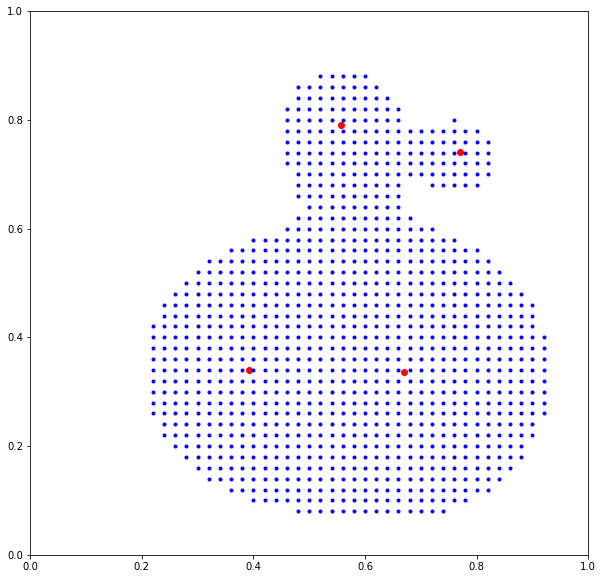

In [4]:
g, s = ensalea(flag = True)

In [5]:
g

array([[0.76964928, 0.74169663],
       [0.67012386, 0.33631699],
       [0.55730344, 0.78981826],
       [0.39264843, 0.34038266]])

In [6]:
s

array([0.04174353, 0.22342299, 0.08410953, 0.13937847])

In [7]:
get_classe(0.2, 0.2, g, s)

0

### Fonction intens

In [8]:
def intens(X1, X2, g ,s):
    
    # retourne la classe Y des points (x1,x2)
    n = X1.shape[0]
    Y = np.zeros(n)
    for i in range(n):
        Y[i] = get_classe(X1[i], X2[i], g, s)
        
    return Y   

In [9]:
X1 = np.array([0, 0.2, 0.4])
X2 = np.array([0.3, 0.2, 0.8])
Y = intens(X1, X2, g, s)

In [10]:
Y

array([0., 0., 0.])

### Fonction Echantillon

In [11]:
def echant(l, g, s, display = False):
    # construit un échantillon de taille l
    # retourne X1, X2, Y tableaux 1D
    
    X1 = np.zeros(l)
    X2 = np.zeros(l)
    Y = np.zeros(l)
    
    for i in range(l):
        X1[i] = np.random.uniform(0.0,1.0)
        X2[i] = np.random.uniform(0.0,1.0)
        Y[i] = get_classe(X1[i],X2[i],g,s)

    if display:
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(1,1,1)
        for i in range(l):
            if Y[i] == 1:
                plt.scatter(X1[i], X2[i], color='blue', marker='+')  # classe positive
            else:
                plt.scatter(X1[i], X2[i], color='green', marker='o')  # classe négative
        axes = plt.gca()
        axes.set_ylim([0.0,1.0])
        axes.set_xlim([0.0,1.0])
        plt.show()
        
    return X1, X2, Y        

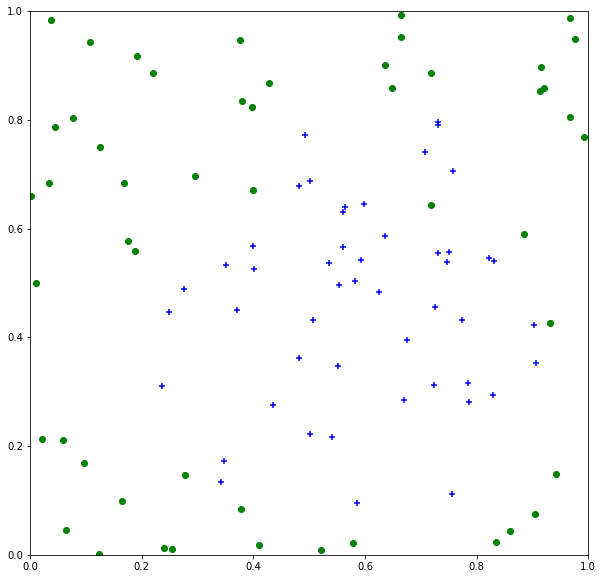

In [12]:
X1,X2,Y = echant(100,g,s,display=True)

### Fonction estens

In [13]:
def estens(X1, X2, Y, p=3):
    # pour un échantillon  d'apprentissage X1, X2, Y
    # pour p
    # renvoie matrice B de taille p x p
    # et le risque empirique
    
    l = Y.shape[0] # taille échantillon
    
    # calcul de B
    B = np.zeros((p,p))
    # print(B.shape)
    for i in range(p):
        for j in range(p):
            l_plus_ij = 0
            l_moins_ij = 0
            # calcule les deux
            for k in range(l):
                x1 = X1[k]
                x2 = X2[k]
                in_cij = (x1 >= i/p) & (x1 <= (i+1)/p) & (x2 >= j/p) & (x2 <= (j+1)/p)
                if in_cij:
                    if Y[k] == 1:
                        l_plus_ij += 1
                    else:
                        l_moins_ij += 1
            B[i,j] = 1 if l_plus_ij >= l_moins_ij else 0
            # print(f"B[{i},{j}]={B[i,j]}, l+ = {l_plus_ij}, l- = {l_moins_ij}")

    # calcul risque empirique
    Re = 0
    for k in range(l):
        x1 = X1[k]
        x2 = X2[k]
        # regarde la classe prédite par le classifier que l'on vient de construire
        # dans quel c_ij est-on ?
        i = int(p*x1)
        j = int(p*x2)
        # print(f"x1 = {x1}, x2 = {x2}")
        # print(f"indices : i = {i}, j = {j}")
        y_pred = B[i,j]
        # print(f"classe pred = {y_pred}")
        # classe réelle
        y_truth = get_classe(x1,x2,g,s)
        # print(f"classe réelle = {y_truth}")
        # Re+1 si mauvaise prédiction
        if y_truth != y_pred:
            Re += 1
    Re = Re/l
    
    return B, Re

In [14]:
B, Re = estens(X1, X2, Y, 20)

In [15]:
B

array([[1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
        1., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 0., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 0., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1.],
       [0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        0., 1., 0., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.

In [16]:
Re

0.01

### Fonction évaluation sur Test Set

In [17]:
def testens(B,m,g,s):
    
    # construit le test set de taille m
    X1_test, X2_test, Y_test = echant(m, g, s)
    
    # taille du classifier
    p = B.shape[0]
    
    # calcul risque empirique
    # NB : le calcul de Re intervient 2 fois, à factoriser
    Re = 0
    for k in range(m):
        x1 = X1_test[k]
        x2 = X2_test[k]
        # regarde la classe prédite par le classifier que l'on vient de construire
        # dans quel c_ij est-on ?
        i = int(p*x1)
        j = int(p*x2)
        # print(f"x1 = {x1}, x2 = {x2}")
        # print(f"indices : i = {i}, j = {j}")
        y_pred = B[i,j]
        # print(f"classe pred = {y_pred}")
        # classe réelle
        y_truth = get_classe(x1,x2,g,s)
        # print(f"classe réelle = {y_truth}")
        # Re+1 si mauvaise prédiction
        if y_truth != y_pred:
            Re += 1
    Re = Re/m
    
    return Re

In [18]:
testens(B,100,g,s)

0.55

### Courbes

échantillon taille 100


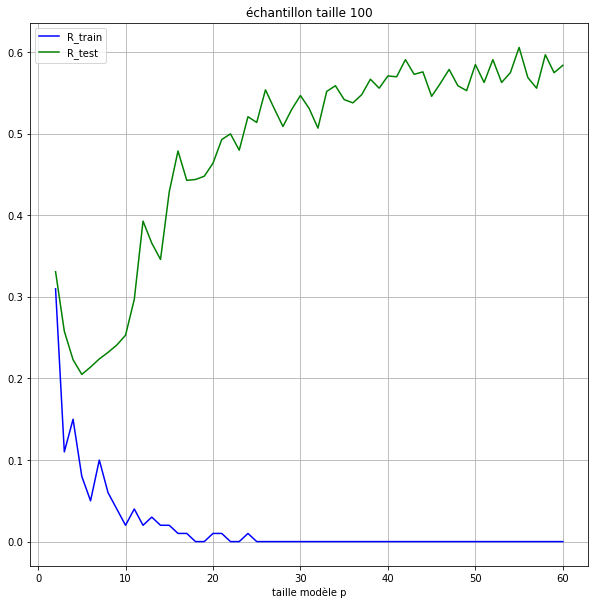

échantillon taille 500


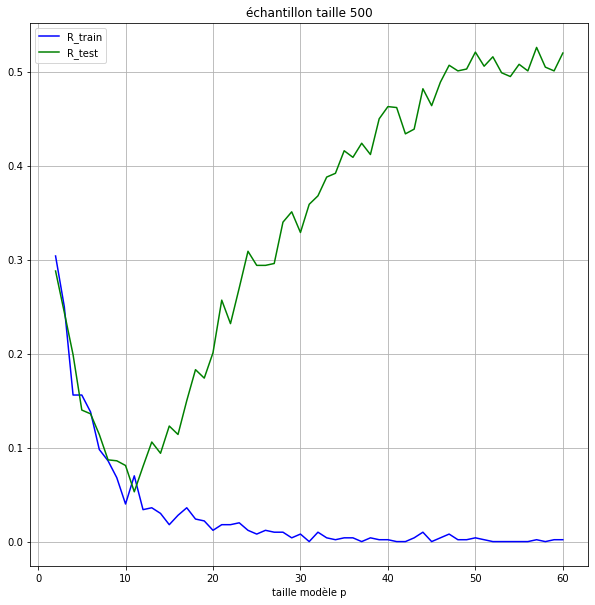

échantillon taille 1000


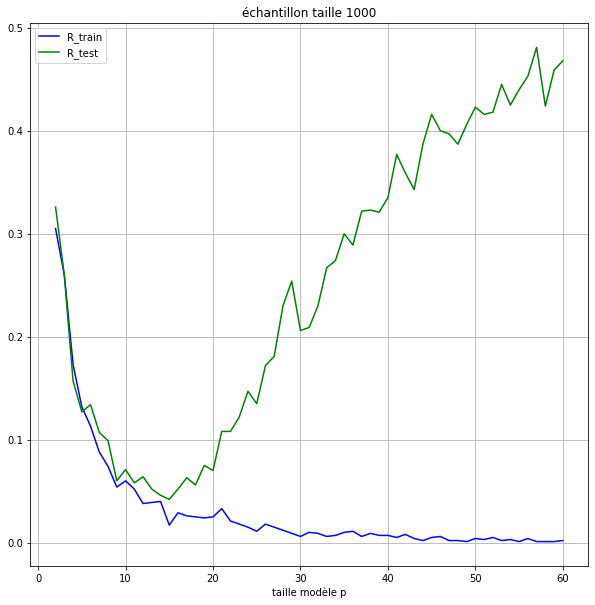

échantillon taille 10000


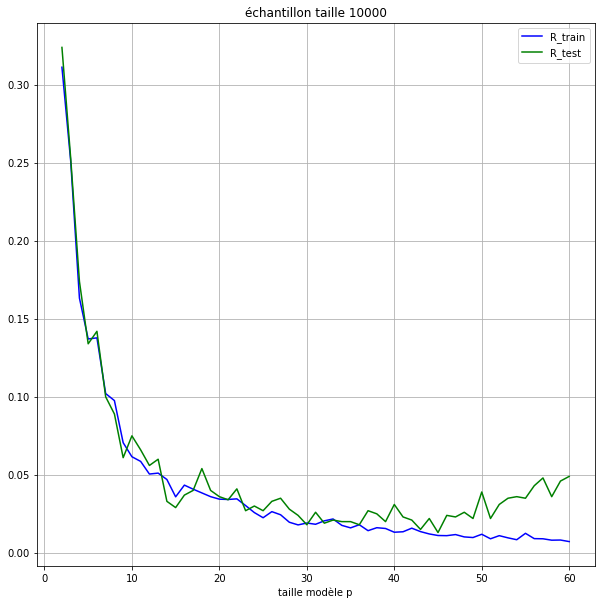

In [19]:
tailles_echantillon = [100, 500, 1000, 10000]

p_min = 2
p_max = 60

for l in tailles_echantillon:
    print(f"échantillon taille {l}")
    R_train = np.zeros(p_max-p_min+1)
    R_test = np.zeros(p_max-p_min+1)
    
    for p in range(p_min,p_max+1):
        # p : taille modèle
        # print(f"modèle taille {p}")
        X1_train, X2_train, Y_train = echant(l, g, s, display = False)
        B, R_train[p-p_min] = estens(X1_train, X2_train, Y_train, p)
        taille_test = 1000
        R_test[p-p_min] = testens(B,taille_test,g,s)
        
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    x = range(p_min,p_max+1)
    plt.plot(x, R_train, label = 'R_train', color='blue')
    plt.plot(x, R_test, label = 'R_test', color='green')
    titre = 'échantillon taille ' + str(l)
    plt.title(titre)
    plt.xlabel('taille modèle p')
    plt.grid(True)
    plt.legend()
    plt.show()


Calcul $m_{0} = \left[ -\frac{\mathrm{log}(\eta/2)}{2\epsilon^{2}} \right]$


Donne la taille échantillon nécessaire pour que R_test approxime à $\epsilon$ près l'erreur de généralisation du modèle, avec la probabilité $1-\eta$

In [20]:
eta = 0.05
epsilon = 0.02
m0 = int((-np.log(eta/2)/(2*epsilon**2)))

In [21]:
print(m0)

4611


# Commentaires

1) A taille d'échantillon l fixé : R_train diminue avec la taille du modèle, R_test commence par diminuer puis remonte quand le modèle commence à 'sur-apprendre' les données d'apprentissage : over-fitting.

2) L'optimal de R_test, cad la meilleure performance possible sur un set de généralisation, est d'autant meilleure que la taille de l'échantillon de training augmente. 

3) L'optimal de R_test est donné par des modèles plus grands, quand la taille de l'échantillon augmente. On peut complexifier/agrandir le modèle et obtenir une meilleure performance de généralisation, dès lors que la taille de l'échantillon augmente.

4) On calcule une taille échantillon nécessaire supérieure à 4611 points